In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/whats-cooking-kernels-only/sample_submission.csv.zip
/kaggle/input/whats-cooking-kernels-only/train.json
/kaggle/input/whats-cooking-kernels-only/test.json


In [2]:
train = pd.read_json("../input/whats-cooking-kernels-only/train.json")
test = pd.read_json("../input/whats-cooking-kernels-only/test.json")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

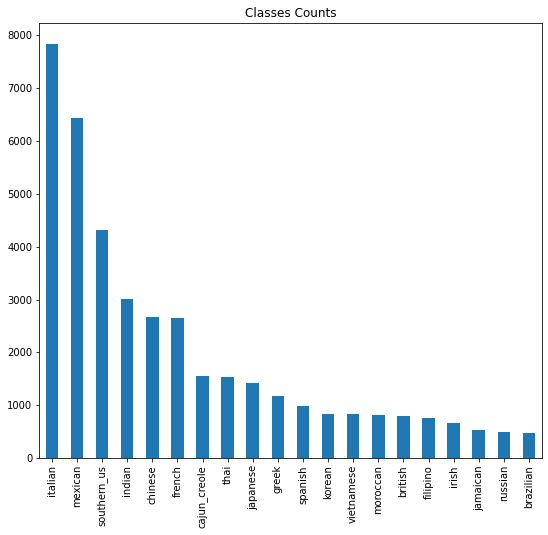

In [4]:
plt.figure(figsize=(9, 8))
train.cuisine.value_counts().plot.bar(title='Classes Counts')
plt.show()

In [5]:
print('Maximum Number of Ingredients in a recipe: ',train['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a recipe: ',train['ingredients'].str.len().min())

Maximum Number of Ingredients in a recipe:  65
Minimum Number of Ingredients in a recipe:  1


In [6]:
from nltk.stem import WordNetLemmatizer

In [7]:
train.ingredients=train.ingredients.apply(lambda x: ''.join([str(e).replace(' ', '') for e in x]))

In [8]:
train.ingredients 

0        romainelettuceblackolivesgrapetomatoesgarlicpe...
1        plainflourgroundpeppersalttomatoesgroundblackp...
2        eggspeppersaltmayonaisecookingoilgreenchiliesg...
3                               watervegetableoilwheatsalt
4        blackpeppershallotscornflourcayennepepperonion...
                               ...                        
39769    lightbrownsugargranulatedsugarbutterwarmwaterl...
39770    KRAFTZestyItalianDressingpurpleonionbroccolifl...
39771    eggscitrusfruitraisinssourdoughstarterflourhot...
39772    bonelesschickenskinlessthighmincedgarlicsteame...
39773    greenchilejalapenochiliesonionsgroundblackpepp...
Name: ingredients, Length: 39774, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [10]:
cv = TfidfVectorizer(max_df=0.99, min_df=0.001, ngram_range=(1,1))
features = cv.fit_transform(train.ingredients)



In [11]:
from sklearn.linear_model import LogisticRegression


In [12]:
lr = LogisticRegression()
lr.fit(X, y)


NameError: name 'X' is not defined

In [ ]:
y_pred = lr.predict(X)
y_pred

In [ ]:
is_action = lr.predict_proba(X)[:, 1]
is_action

In [ ]:
from sklearn import metrics


In [ ]:
accs = []
f1_scores = []
for t in np.linspace(0.1, 1, 10):
    y_pred = is_action>t
    print('t = ', t)
    print('acc = ', metrics.accuracy_score(y, y_pred))
    print('f1 = ', metrics.f1_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))
    print('-')

print('max f1 score = ', max(f1_scores))